In [1]:
import pandas as pd
import jax.numpy as jnp
import numpyro
import numpy as np
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing

In [2]:
def add_date_range_with_cost(final_df, start_date, end_date, total_cost):
    
    date_range = pd.date_range(start=start_date, end=end_date)
    
    num_days = len(date_range)
    
    cost_per_day = total_cost / num_days
    
    new_dates_df = pd.DataFrame({
        'date': date_range,
        'cost': [cost_per_day] * num_days
    })
    
    updated_df = final_df.append(new_dates_df, ignore_index=True)
    
    updated_df['date'] = pd.to_datetime(updated_df['date'])
    updated_df.sort_values(by='date', inplace=True)
    
    updated_df = updated_df.groupby('date')['cost'].sum().reset_index()
    
    return updated_df

In [3]:
file_names = [
    'data tv - C8 Star +.csv',
    'data tv - M6.csv',
    'data tv - nrj12.csv',
    'data tv - tf1 2.csv',
    'data tv - TF1 Séries Films.csv',
    'data tv - tf1.csv',
    'data tv - tfx.csv',
    'data tv - tmc.csv',
    'data tv - tnt.csv',
    'data tv - W96ter Puissance TNT.csv'
]

dataframes = {f"df{i}": pd.read_csv(file_name) for i, file_name in enumerate(file_names, start=1)}

date_formats = '%d/%m/%Y'

for df_name, df in dataframes.items():
    df.dropna(axis=0, inplace=True)
    df['date'] = pd.to_datetime(df['date'], format= date_formats)
    
    df['cost'] = df.groupby('date')['cost'].transform('sum')
    df.drop_duplicates(subset='date', inplace=True)
    if df_name not in ['df6', 'df9']:
        df['cost'] = df['cost'] / 2
all_dfs_combined = pd.concat(dataframes.values(), ignore_index=True)

final_df = all_dfs_combined.groupby('date')['cost'].sum().reset_index()
final_df = add_date_range_with_cost(final_df, '2021-04-18', '2021-05-09', 132571)
final_df = add_date_range_with_cost(final_df, '2021-05-25', '2021-06-13', 98035)


C:\Users\Arij\AppData\Local\Temp\ipykernel_16872\1967173915.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_df = final_df.append(new_dates_df, ignore_index=True)
C:\Users\Arij\AppData\Local\Temp\ipykernel_16872\1967173915.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_df = final_df.append(new_dates_df, ignore_index=True)


In [4]:
start_date = final_df['date'].min()
end_date = final_df['date'].max()

print("Date Range: {} to {}".format(start_date, end_date))

Date Range: 2020-10-25 00:00:00 to 2022-07-10 00:00:00


In [5]:
final_df.set_index('date', inplace=True)

full_date_range = pd.date_range(start='2020-01-01', end='2022-12-31')

final_df = final_df.reindex(full_date_range)

final_df['cost'].fillna(0, inplace=True)

final_df.reset_index(inplace=True)

In [6]:
ads_spend=pd.read_csv('data tv - ads spend.csv')
ads_spend['date']=pd.to_datetime(ads_spend['date'])
ads_spend = ads_spend.groupby('date').sum().reset_index()


In [7]:
ads_spend

,date,google,meta
0,2020-01-01,991.81,0.0000
1,2020-01-02,5742.32,0.0000
2,2020-01-03,5806.89,0.0000
3,2020-01-04,4881.33,0.0000
4,2020-01-05,5214.06,0.0000
...,...,...,...
1091,2022-12-27,6975.78,1503.6855
1092,2022-12-28,7543.94,1765.8900
1093,2022-12-29,7754.17,1755.6200
1094,2022-12-30,5096.50,1743.0700


In [8]:
final_df

,index,cost
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0
...,...,...
1091,2022-12-27,0.0
1092,2022-12-28,0.0
1093,2022-12-29,0.0
1094,2022-12-30,0.0


In [9]:
target_data=pd.read_csv('data tv - target.csv')
target_data['date']=pd.to_datetime(target_data['date'])


In [10]:
ads_spend['total_ads']=ads_spend['google']+ads_spend['meta']
ads_spend

,date,google,meta,total_ads
0,2020-01-01,991.81,0.0000,991.8100
1,2020-01-02,5742.32,0.0000,5742.3200
2,2020-01-03,5806.89,0.0000,5806.8900
3,2020-01-04,4881.33,0.0000,4881.3300
4,2020-01-05,5214.06,0.0000,5214.0600
...,...,...,...,...
1091,2022-12-27,6975.78,1503.6855,8479.4655
1092,2022-12-28,7543.94,1765.8900,9309.8300
1093,2022-12-29,7754.17,1755.6200,9509.7900
1094,2022-12-30,5096.50,1743.0700,6839.5700


In [11]:
ads_spend

,date,google,meta,total_ads
0,2020-01-01,991.81,0.0000,991.8100
1,2020-01-02,5742.32,0.0000,5742.3200
2,2020-01-03,5806.89,0.0000,5806.8900
3,2020-01-04,4881.33,0.0000,4881.3300
4,2020-01-05,5214.06,0.0000,5214.0600
...,...,...,...,...
1091,2022-12-27,6975.78,1503.6855,8479.4655
1092,2022-12-28,7543.94,1765.8900,9309.8300
1093,2022-12-29,7754.17,1755.6200,9509.7900
1094,2022-12-30,5096.50,1743.0700,6839.5700


In [12]:
final_df = final_df.rename(columns={'cost': 'tv cost', 'index': 'date'})


In [13]:
final_df=final_df.merge(ads_spend, how='left', on='date')


In [14]:
final_df

,date,tv cost,google,meta,total_ads
0,2020-01-01,0.0,991.81,0.0000,991.8100
1,2020-01-02,0.0,5742.32,0.0000,5742.3200
2,2020-01-03,0.0,5806.89,0.0000,5806.8900
3,2020-01-04,0.0,4881.33,0.0000,4881.3300
4,2020-01-05,0.0,5214.06,0.0000,5214.0600
...,...,...,...,...,...
1091,2022-12-27,0.0,6975.78,1503.6855,8479.4655
1092,2022-12-28,0.0,7543.94,1765.8900,9309.8300
1093,2022-12-29,0.0,7754.17,1755.6200,9509.7900
1094,2022-12-30,0.0,5096.50,1743.0700,6839.5700


In [15]:
final_df=final_df.merge(target_data, how='left', on='date')


Aggregating weekly

In [16]:
final_df.set_index('date', inplace=True)
weekly_df = final_df.resample('W-MON', closed='left', label='left').sum(min_count=1)
weekly_df.dropna(inplace=True)

weekly_df.reset_index(inplace=True)

weekly_df

,date,tv cost,google,meta,total_ads,transactions,revenue
0,2019-12-30,0.0,22636.41,0.00000,22636.41000,660,234680.48
1,2020-01-06,0.0,32659.48,0.00000,32659.48000,1212,404318.82
2,2020-01-13,0.0,27188.94,0.00000,27188.94000,969,300649.25
3,2020-01-20,0.0,22188.01,0.00000,22188.01000,904,264856.30
4,2020-01-27,0.0,24572.55,0.00000,24572.55000,1120,336892.45
...,...,...,...,...,...,...,...
152,2022-11-28,0.0,106183.68,14108.81320,120292.49320,4851,1954507.88
153,2022-12-05,0.0,100584.54,17708.86536,118293.40536,5080,2026397.69
154,2022-12-12,0.0,108875.68,27314.54432,136190.22432,4943,2019790.86
155,2022-12-19,0.0,61436.29,17785.56759,79221.85759,3246,1341440.57


Lightweight MMM

In [204]:
mdsp_cols=['tv cost', 'google','meta']
SEED= 105
data_size = len(weekly_df)
n_media_channels = len(mdsp_cols)
media_data = weekly_df[mdsp_cols].to_numpy()
target = weekly_df['transactions'].to_numpy()
costs = weekly_df[mdsp_cols].sum().to_numpy()


In [205]:
test_data_period_size = 13
split_point = data_size - test_data_period_size
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]
target_train = target[:split_point]
media_names=["tv", "google", "meta"]

In [206]:
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)

media_data_train = media_scaler.fit_transform(media_data_train)

target_train = target_scaler.fit_transform(target_train)
costs = cost_scaler.fit_transform(costs)

In [207]:
correlations, variances, spend_fractions, variance_inflation_factors = preprocessing.check_data_quality(
    media_data=media_scaler.transform(media_data),
    target_data=target_scaler.transform(target),
    cost_data=costs)

In [208]:
correlations[0].style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)


,feature_0,feature_1,feature_2,target
feature_0,1.000000,0.226187,-0.035733,0.184409
feature_1,0.226187,1.000000,0.483523,0.895105
feature_2,-0.035733,0.483523,1.000000,0.663213
target,0.184409,0.895105,0.663213,1.000000


In [209]:
mmm = lightweight_mmm.LightweightMMM(model_name="adstock")

In [210]:
number_warmup=2000
number_samples=2000

In [211]:
mmm.fit(
    media=media_data_train,
    media_prior=costs,
    target=target_train,
    number_warmup=number_warmup,
    number_samples=number_samples,
    media_names= media_names,
    degrees_seasonality=3,
    
    seed=SEED)

c:\Users\Arij\AppData\Local\Programs\Python\Python310\lib\site-packages\lightweight_mmm\lightweight_mmm.py:358: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(
sample: 100%|██████████| 4000/4000 [01:24<00:00, 47.21it/s, 255 steps of size 1.92e-02. acc. prob=0.91] 


In [212]:
mmm.print_summary()   



                            mean       std    median      5.0%     95.0%     n_eff     r_hat
         coef_media[0]      0.14      0.05      0.14      0.07      0.22   1002.88      1.00
         coef_media[1]      0.76      0.05      0.75      0.67      0.85   1019.12      1.00
         coef_media[2]      0.23      0.09      0.22      0.08      0.36   1526.87      1.00
         coef_trend[0]     -0.01      0.01     -0.01     -0.03      0.01   1089.97      1.00
            expo_trend      0.67      0.13      0.64      0.50      0.88   1151.82      1.00
           exponent[0]      0.87      0.11      0.90      0.72      1.00   2762.20      1.00
           exponent[1]      0.96      0.03      0.97      0.92      1.00   1555.10      1.00
           exponent[2]      0.94      0.05      0.96      0.87      1.00   2740.91      1.00
gamma_seasonality[0,0]      0.06      0.02      0.06      0.02      0.09   1565.16      1.00
gamma_seasonality[0,1]     -0.04      0.02     -0.04     -0.08     -0

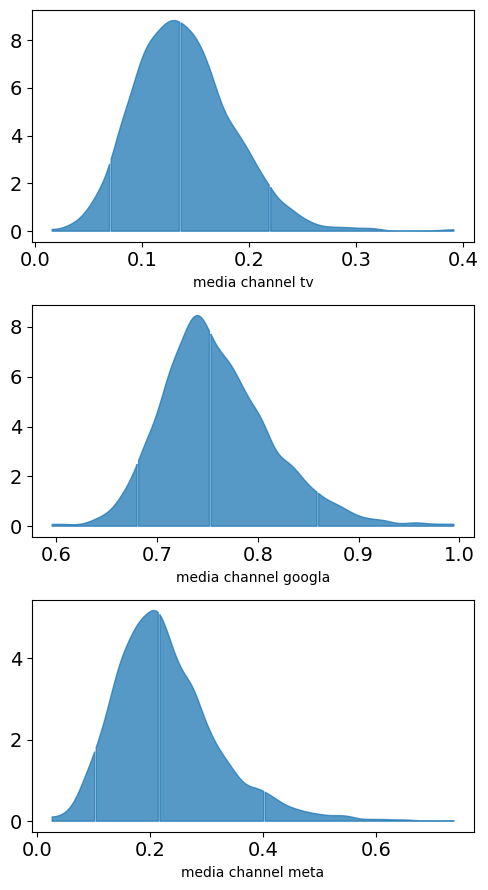

In [213]:
plot.plot_media_channel_posteriors(media_mix_model=mmm, channel_names=media_names )


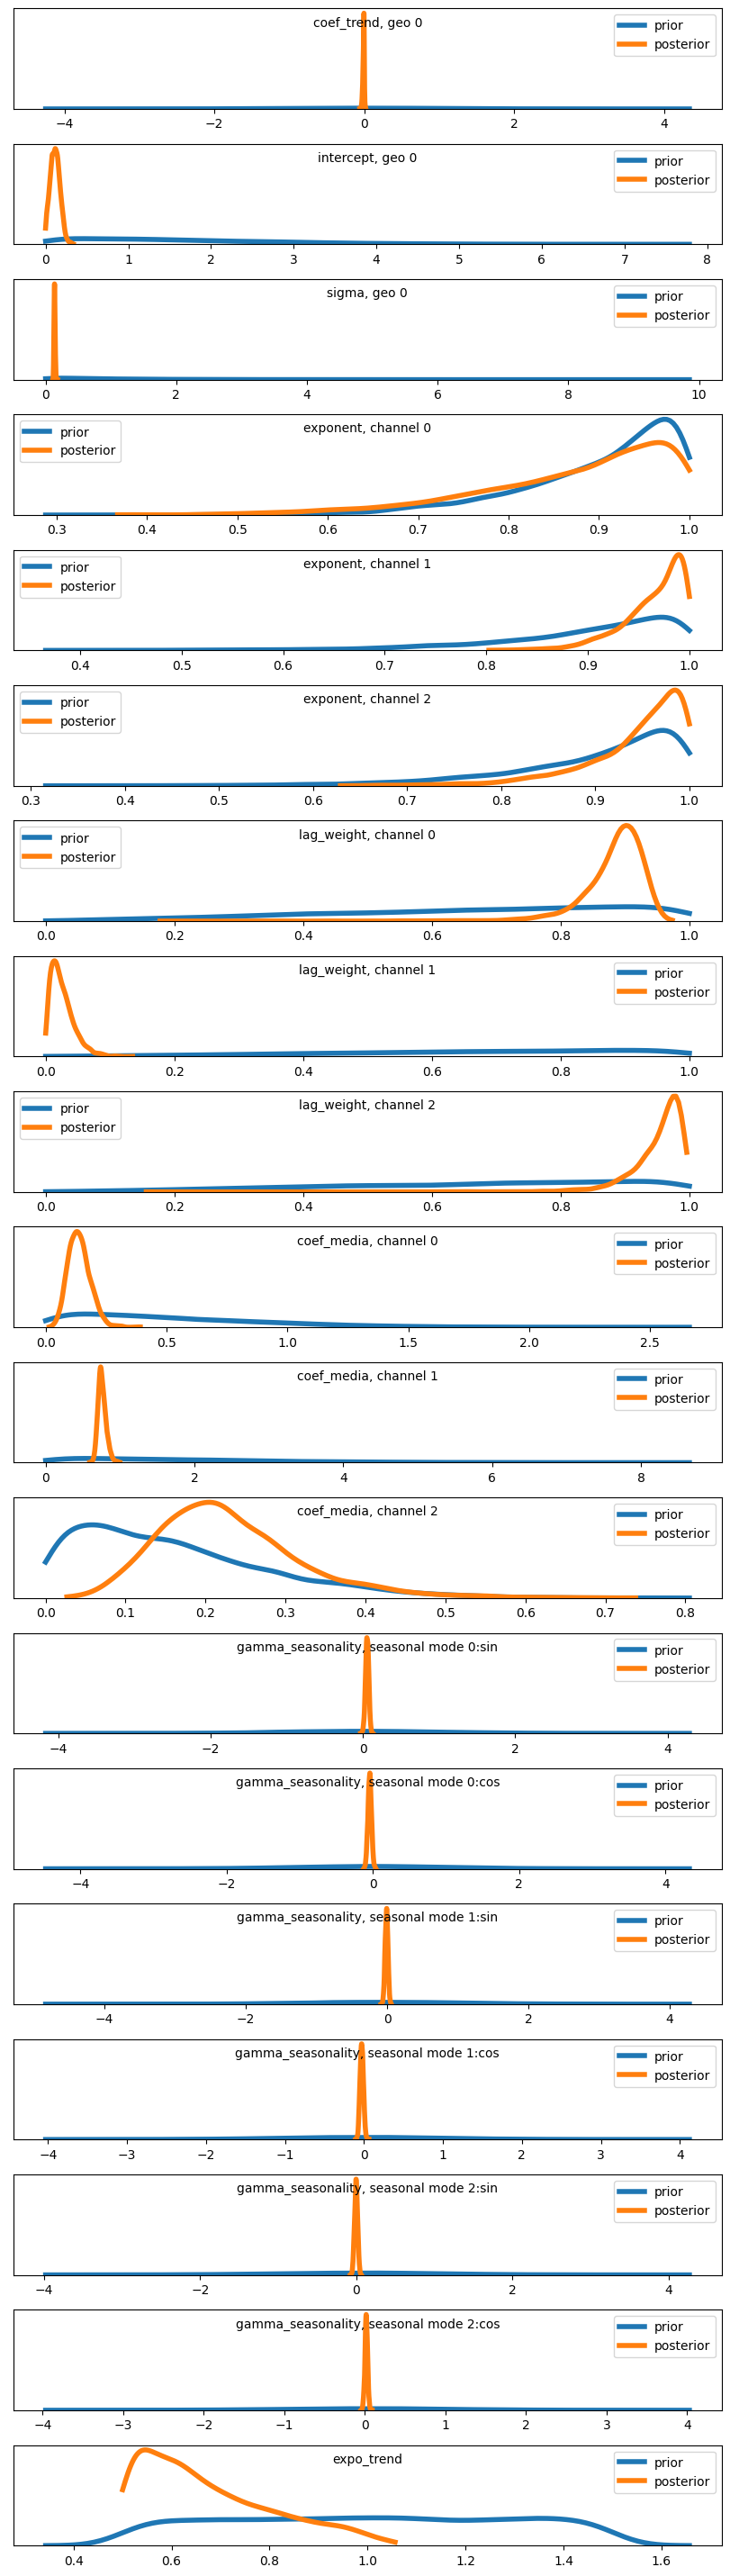

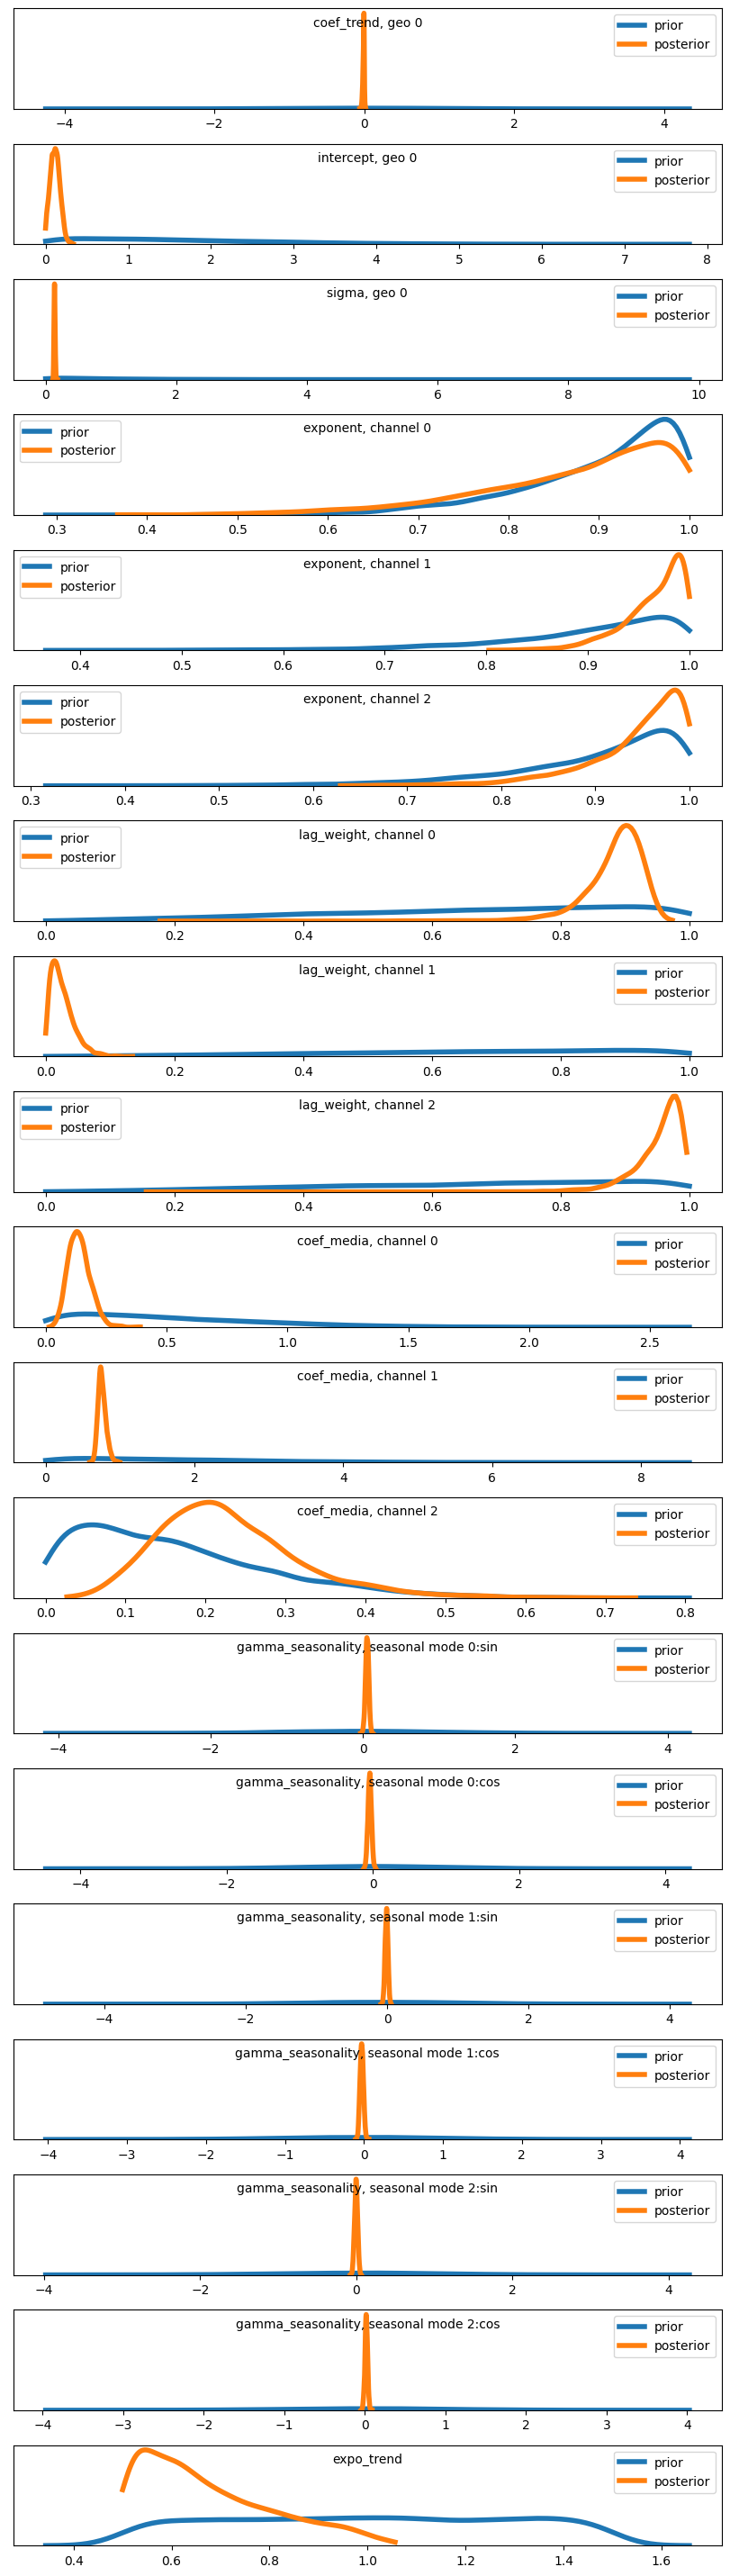

In [214]:
plot.plot_prior_and_posterior(media_mix_model=mmm)


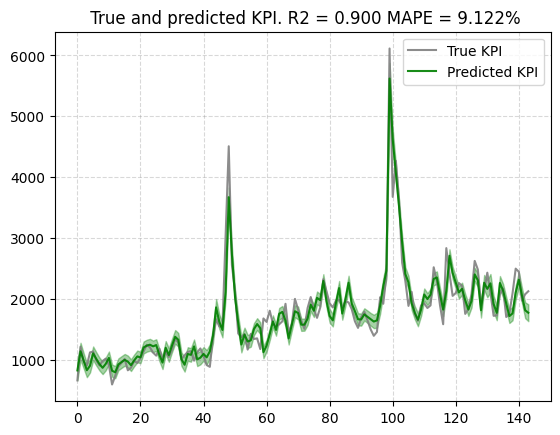

In [215]:
plot.plot_model_fit(mmm, target_scaler=target_scaler )


In [216]:
new_predictions = mmm.predict(media=media_scaler.transform(media_data_test), 
                              target_scaler=target_scaler,
                              seed=SEED)
new_predictions.shape

(4000, 13)

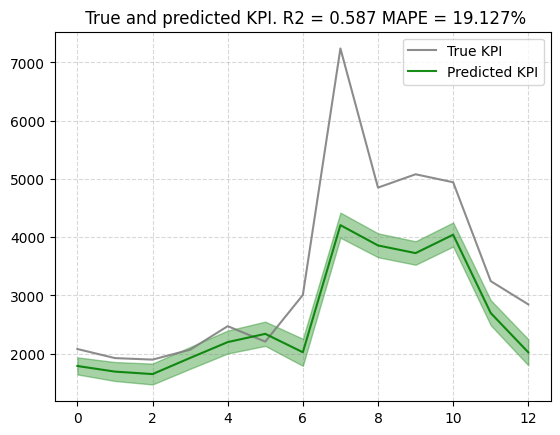

In [217]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target[split_point:])

In [218]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)


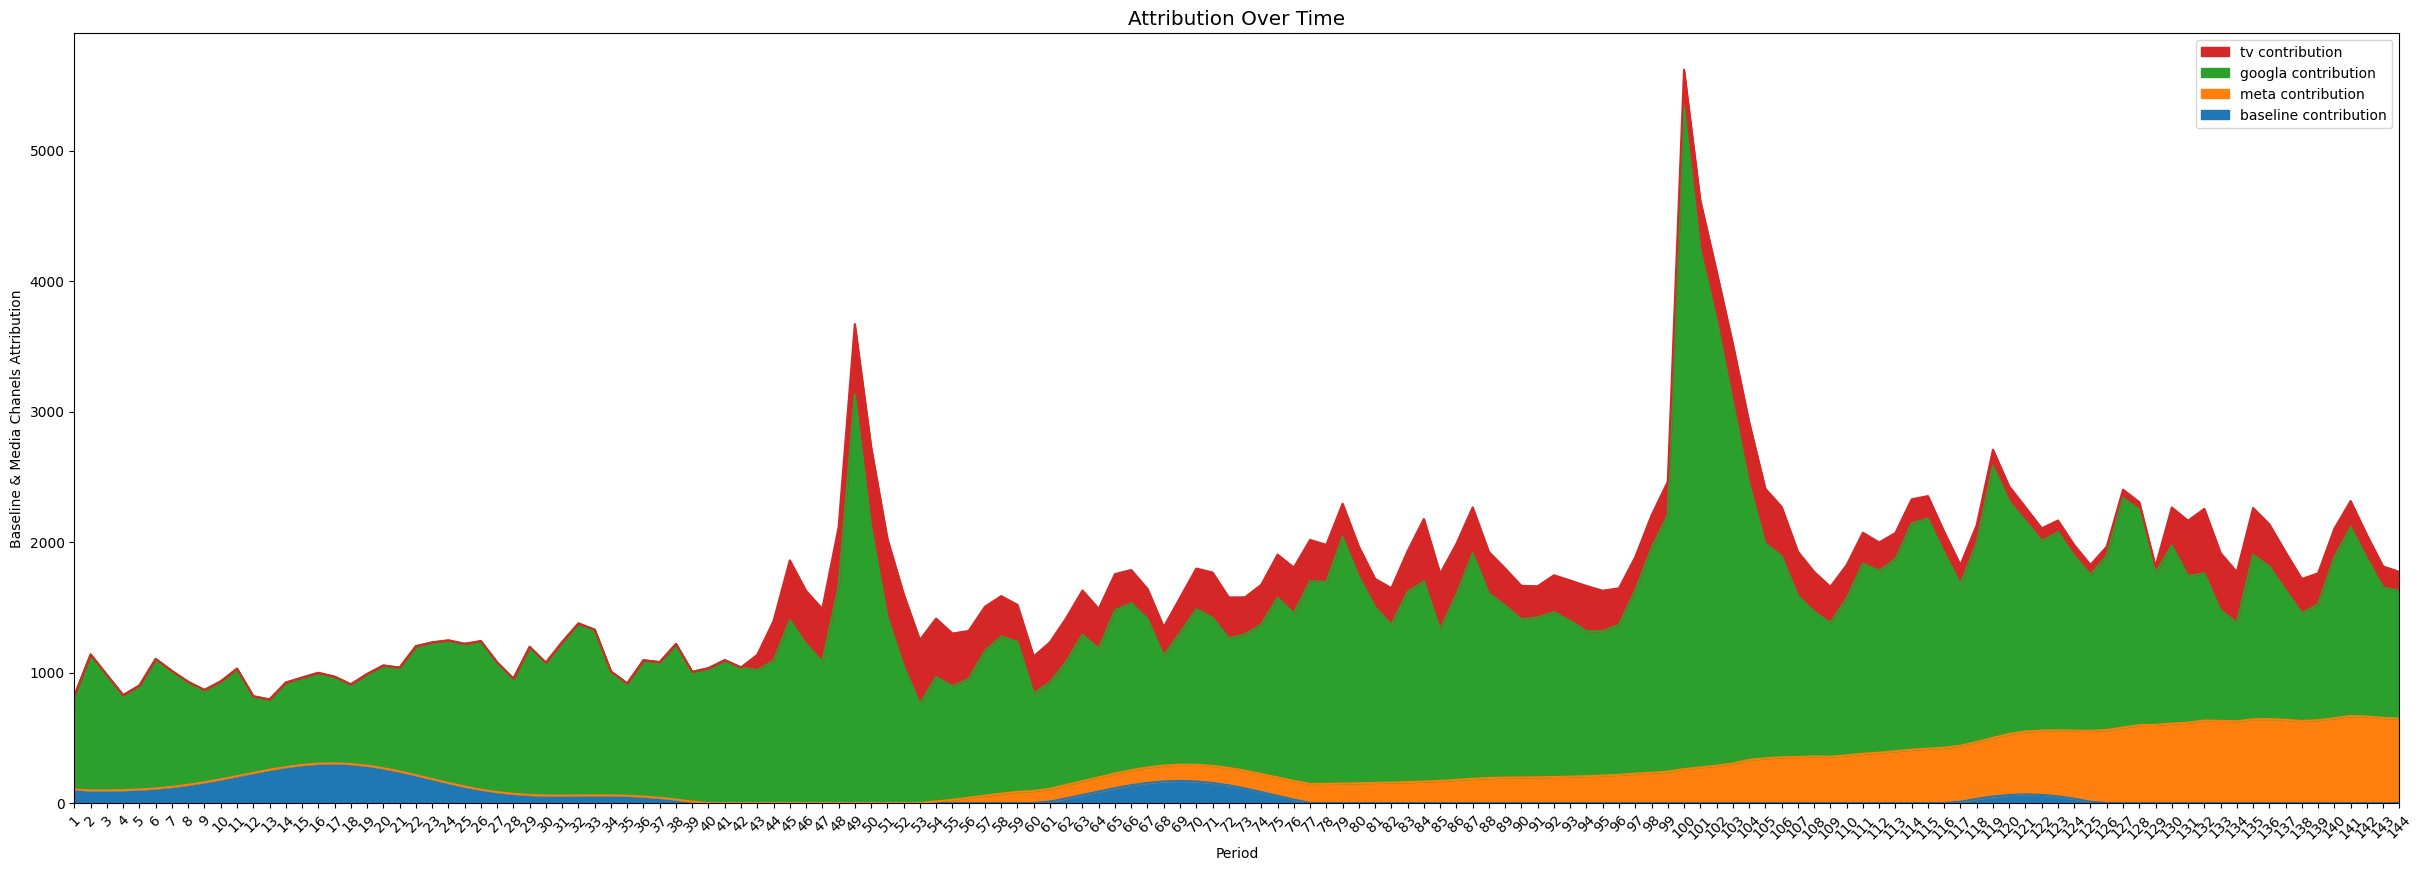

In [219]:
plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10))

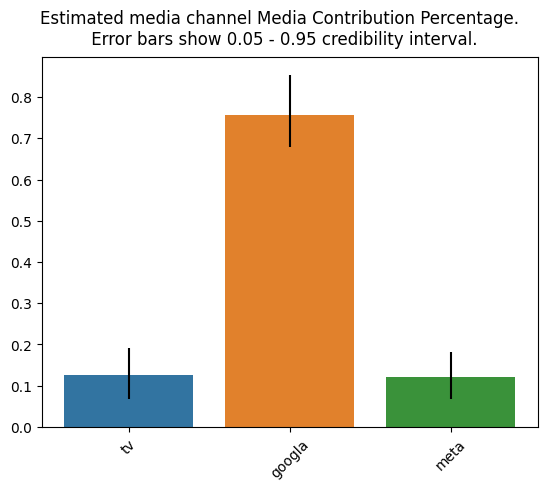

In [220]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage", channel_names=media_names)


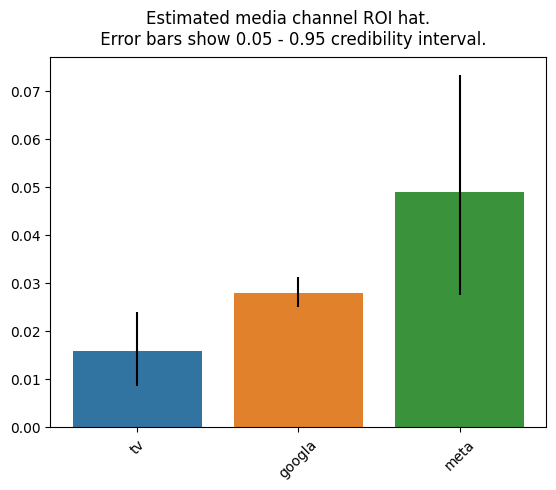

In [221]:
plot.plot_bars_media_metrics(metric=roi_hat, metric_name="ROI hat", channel_names=media_names)
